In [ ]:
#import torch package. 
import torch


In [ ]:
# Check available devices
# Device configuration

torch.device('cuda' if torch.cuda.is_available() else 'cpu')


device(type='cuda')

In [ ]:
# What? Download MNIST dataset in local system
# How: download MNIST dataset through torchvision for train and test data separately and transform both into numpy.ndarray

from torchvision import datasets

from torchvision.transforms import ToTensor


train_data = datasets.MNIST(
    root = 'data', #root (string) – Root directory of dataset where mnist file exists
    train = True,   #train (bool, optional) – If True, creates dataset from train imageset, otherwise from other imageset                      
    transform = ToTensor(), #ToTensor() = Convert a PIL Image or numpy.ndarray to tensor.
    download = True,    #download (bool, optional) – If True, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.        
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)


In [ ]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
print(len(train_data))
print(len(test_data))

60000
10000


In [ ]:
#get image and label in position 0
img_tensor, label = train_data[0]
#print the shape of the array of image and the label
print(img_tensor.shape, label)

#output = 1 channel, height/width 28, height/width 28, label = 5

torch.Size([1, 28, 28]) 5


In [ ]:
img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

According to the three cells before:


* train_data contains 60000 elements
* test_data contains 10000 elements
* 1 image has 1 channel (pixel number shows the value between black and white), and the height and width 28 x 28 



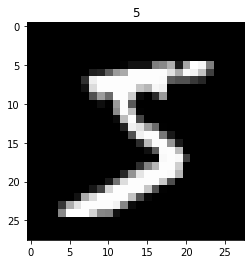

In [ ]:
#Plot one train_data

import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray', vmin=0, vmax=255)
#print title as number from train_data.targets
plt.title('%i' % train_data.targets[0])
plt.show()

## Prepare data for training with DataLoaders

In [ ]:
# DataLoader is an iterable that abstracts this complexity for us in an easy API.

from torch.utils.data import DataLoader
#data is put into dict with two entries: train & test
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, #dataset (Dataset) – dataset from which to load the data.
                                          batch_size=100, #batch_size (int, optional) – how many samples per batch to load (default: 1). 100 individual fetched data samples are put into 1 batch
                                          shuffle=True, #shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False) If shuffle is set to True, then all the samples are shuffled and loaded in batches. Otherwise they are sent one-by-one without any shuffling.
                                          num_workers=1), #num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f859a86ff10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f859a86fb20>}

In [ ]:
loaders['train']

In [ ]:
data = next(iter(loaders['train']))


'\n1. Make DataLoader an iterator to use next() with iter(DataLoader)\n1. Now we can use next() (to get next batch in DataLoader)\n\n\nThe DataLoader is a function that iterates through all our available data and \nreturns it in the form of batches. For example, if we have a dataset of 32 images, \nand we decide to batch the data with a size of 4. Our DataLoader would process \nthe data, and return 8 batches of 4 images each.\n'

# Pre-Class Functions

In [ ]:
#@title Padding Function
def add_padding(img, padding):
  #per channel
  output = torch.empty((img.size()[0],img.size()[2]+2*padding, img.size()[2]+2*padding))
  for c in range(img.size(dim=0)):
    #per row
    for row in range(img.size(dim=1)):
      #per column value
      for value in range(img.size(dim=2)):
        output[c][row+padding][value+padding] = img[c][row][value]
  return output

In [ ]:
input_img = torch.tensor([[[2,0,0,1,0],
                          [0,2,0,0,2],
                          [0,2,0,2,2],
                          [0,2,0,2,1],
                          [0,2,2,2,1]],

                          [[2,0,0,1,0],
                          [0,1,0,0,0],
                          [2,1,1,2,1],
                          [0,0,1,1,1],
                          [1,2,0,1,1]],

                          [[2,0,0,1,0],
                          [1,1,2,1,2],
                          [2,2,1,2,2],
                          [0,0,0,0,0],
                          [2,1,2,2,0]]], dtype=torch.long)

padded = add_padding(input_img, 1)

In [ ]:
padded

tensor([[[-5.4423e-23,  4.5745e-41, -3.2531e-31,  4.5747e-41, -4.1883e-35,
           4.5747e-41,  0.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,
           2.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  2.0000e+00,  0.0000e+00,  2.0000e+00,
           2.0000e+00,  4.2039e-45],
         [ 1.7096e-43,  0.0000e+00,  2.0000e+00,  0.0000e+00,  2.0000e+00,
           1.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  2.0000e+00,  2.0000e+00,  2.0000e+00,
           1.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
           0.0000e+00,  0.0

In [ ]:
#@title sum_img_filter Function
def sum_img_filter(img_slice, filter, bias):
  value_sum = 0
  for c in range(len(filter)):
    for row in range(len(img_slice[c])):
      for v in range(len(img_slice[c][row])):
        value = img_slice[c][row][v] * filter[c][row][v]
        value_sum += value
  value_sum = value_sum + bias
  return value_sum

In [ ]:
tensor1 = torch.randn(3,3)
tensor2 = torch.randn(3,3)

print(tensor1)
print(tensor2)

tensor([[-0.2803,  1.0749,  1.9213],
        [-1.2983, -0.2435,  2.0093],
        [ 2.2427,  1.1086, -0.7875]])
tensor([[-0.3463,  0.3993,  0.4513],
        [-0.0893, -1.2110,  0.3275],
        [ 0.7552, -1.2894, -0.3059]])


In [ ]:
import numpy as np
b = torch.matmul(tensor1, tensor2)

c = np.tensordot(tensor1,tensor2, 1)
b

tensor([[ 1.4520, -3.8909, -0.3623],
        [ 1.9888, -2.8144, -1.2805],
        [-1.4704,  0.5684,  1.6162]])

In [ ]:
a_ten = torch.tensor([[[2,0,0],
                          [0,2,0],
                          [0,2,0]],

                          [[2,0,0],
                          [0,1,0],
                          [2,1,1]],

                          [[2,0,0],
                          [1,1,2],
                          [2,2,1]]], dtype=torch.long)
filter_ten = torch.tensor(             [[[1,1,1],
                          [1,1,1],
                          [1,1,1]],

                          [[1,1,1],
                          [1,1,1],
                          [1,1,1]],

                          [[1,1,1],
                          [1,1,1],
                          [1,1,1]]])

In [ ]:
import numpy as np
b = torch.matmul(a_ten, filter_ten)
b

tensor([[[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[2, 2, 2],
         [1, 1, 1],
         [4, 4, 4]],

        [[2, 2, 2],
         [4, 4, 4],
         [5, 5, 5]]])

In [ ]:
np_a = a_ten.numpy()
np_filter = filter_ten.numpy()


e = np.matmul(np_a, np_filter)
e

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [1, 1, 1],
        [4, 4, 4]],

       [[2, 2, 2],
        [4, 4, 4],
        [5, 5, 5]]])

In [ ]:
print(a_ten[0][1][:])
print(np_a[0][1][:])



tensor([0, 2, 0])
[0 2 0]


In [ ]:
a = np.array(             [[[2,0,0],
                          [0,2,0],
                          [0,2,0]],

                          [[2,0,0],
                          [0,1,0],
                          [2,1,1]],

                          [[2,0,0],
                          [1,1,2],
                          [2,2,1]]])


filter = np.array(             [[[1,1,1],
                          [1,1,1],
                          [1,1,1]],

                          [[1,1,1],
                          [1,1,1],
                          [1,1,1]],

                          [[1,1,1],
                          [1,1,1],
                          [1,1,1]]])


In [ ]:
import numpy as np
d = np.matmul(a, filter)
d

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [1, 1, 1],
        [4, 4, 4]],

       [[2, 2, 2],
        [4, 4, 4],
        [5, 5, 5]]])

In [ ]:
c

array([[ 1.4519912 , -3.8909194 , -0.36226907],
       [ 1.9887745 , -2.8143723 , -1.2804873 ],
       [-1.470385  ,  0.56839675,  1.6162207 ]], dtype=float32)

In [ ]:
#@title img_slice_x_filters Function
def img_slice_x_filters(img, size, stride, row, filter, bias):
    slices = []
    v = 0

    while (v + size) <= img.size(dim=2):
        #one slice
        one_slice = img[:, row : row + size, v : v + size]
        v = v + stride
        slices.append(one_slice)

    #per tensor:
    final_values = []

    for a_slice in range(len(slices)):
      calc = matrix_sum_img_filter(slices[a_slice], filter, bias.item())
      final_values.append(calc)
      
    return final_values

In [ ]:

slices_img = torch.tensor([[[2,0,0,1,0],
                          [0,2,0,0,2],
                          [0,2,0,2,2],
                          [0,2,0,2,1],
                          [0,2,2,2,1]]], dtype=torch.long)


test_filters = torch.tensor([[[[-1,1,1],
                              [-1,-1,0],
                              [1,-1,1]]],

                             [[[-1,1,1],
                              [-1,-1,0],
                              [1,-1,1]]],

                              [[[-1,1,1],
                              [-1,-1,0],
                              [1,-1,1]]]])


output = img_slice_x_filters(slices_img, 3, 2, 0, test_filters[0], torch.tensor([1]))

output

[tensor(-5), tensor(2)]

In [ ]:
#@title max_slice Function
def max_slice(input, size, stride, row):
    max_values = []
    v = 0
    while (v + size) <= len(input):
      one_slice = input[row : row + size, v : v + size]
      v = v + stride
      max_val = torch.max(one_slice)
      max_values.append(max_val.item())

    return max_values



    

In [ ]:
slices_img = torch.tensor([[[2,0,0,1,0],
                          [0,2,0,0,2],
                          [0,2,0,2,2],
                          [0,2,0,2,1],
                          [0,3,2,2,1]],

                          [[2,0,0,1,0],
                          [0,1,0,0,0],
                          [2,1,1,2,1],
                          [0,0,1,1,1],
                          [1,2,0,1,1]]], dtype=torch.long)


max_slice(slices_img[0], 3, 2, 2)


[3, 2]

In [ ]:

filters = torch.rand((2, 3, 3))

filters.size()

torch.Size([2, 3, 3])

In [ ]:
print("filters ", filters)

filters  tensor([[[0.0694, 0.1763, 0.0809],
         [0.4016, 0.3438, 0.5373],
         [0.4877, 0.4836, 0.1702]],

        [[0.2009, 0.7701, 0.8922],
         [0.9455, 0.5349, 0.4143],
         [0.8702, 0.6623, 0.9477]]])


In [ ]:
filters[0]

tensor([[0.0694, 0.1763, 0.0809],
        [0.4016, 0.3438, 0.5373],
        [0.4877, 0.4836, 0.1702]])

In [ ]:

bias = torch.rand(3)

bias.size()

torch.Size([3])

In [ ]:
bias

tensor([0.0322, 0.1002, 0.6058])

# Own Layers

In [ ]:
#@title Class Conv Layer
import torch
import math
from torch.nn.parameter import Parameter, UninitializedParameter


class new_conv_layer(torch.nn.Module):
    run_tests = False
    def __init__(self, in_channels: int,  out_channels: int, kernel_size: int, stride: int, padding: int):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.f_size = kernel_size
        self.padding = padding
        self.n_filter = out_channels
        self.stride = stride
        self.channels = in_channels

        #creates a tensor, shape n_filter x filter, each of the size f_size and 
        #fill them with with random numbers from a uniform distribution on the interval [0, 1)[0,1)
        #in_channels = filter number, out_channels, kernel_size, kernel_size
        self.filters = Parameter(torch.rand(out_channels, in_channels, kernel_size, kernel_size))
        self.bias = Parameter(torch.rand(out_channels, 1))

        self.test_filters = torch.rand((out_channels, kernel_size, kernel_size, in_channels))
        self.test_bias = torch.rand((out_channels, 1))

    def set_filter_bias(self, test_filters, test_bias):
        self.test_filters = test_filters
        self.test_bias = test_bias

    def get_filters(self):
        print(self.filters)

    def get_bias(self):
        print(self.bias)

    def forward(self, img):
        #add padding
        padded_img = add_padding(img, self.padding)
      
        #per filter get img_slice
        output_size = math.ceil(((img.size(dim=1) - self.f_size + 2 * self.padding)/self.stride) + 1)
        
        conv_output = []
        for f in range(self.n_filter):
          output_row= []
          
          if not run_tests:
            row = 0
            for r in range(output_size):
              
              slice_value = img_slice_x_filters(padded_img, self.f_size, self.stride, row, self.filters[f], self.bias[f])
             
              output_row.append(slice_value)
              row += self.stride 
            conv_output.append(output_row)

          else:
            row = 0
            for r in range(output_size):
        
              slice_value = img_slice_x_filters(padded_img, self.f_size, self.stride, row, self.test_filters[f], self.test_bias[f])
              output_row.append(slice_value)
            
              row += self.stride 
            conv_output.append(output_row)
          
        return torch.tensor(conv_output)


In [ ]:

cnn = new_conv_layer(in_channels=1,           
                  out_channels=2,      
                  kernel_size=3,           
                  stride=2,           
                  padding=1)


In [ ]:
print(np.random.randn(3, 3, 3, 3) * np.sqrt(1. / (3)))

[[[[ 0.39172117  0.09070664  0.19546517]
   [ 0.41573614  0.29600461 -0.46691052]
   [ 0.12760424  0.03184918 -1.34476524]]

  [[-0.52109194  0.09344461 -0.54737436]
   [ 0.25750297 -0.1185584   0.28509438]
   [-0.11190525  0.18537692  0.37089682]]

  [[-1.18667679 -1.16147101  0.62150284]
   [-0.89084626 -0.22001881 -1.13075858]
   [ 0.16502882 -0.51058856 -0.27792367]]]


 [[[ 0.03069245  0.14898722  0.48953391]
   [ 0.93728802 -0.34550632  0.77172813]
   [ 0.41977438  1.05254317  0.52595217]]

  [[-0.33664973  0.32886011  0.16685668]
   [-0.29633574 -0.56068245 -0.57882946]
   [ 0.84198883  0.31714103 -0.56898457]]

  [[ 0.70086078  0.14458968  0.33639928]
   [ 0.57682787  0.03977786 -0.33492444]
   [ 0.11961354  0.26567228  0.9590612 ]]]


 [[[ 0.49485324 -0.64151068  0.83723718]
   [ 0.47057157 -0.82605413 -0.46940036]
   [ 0.49022943  0.59052599  0.3986984 ]]

  [[ 0.17540067  0.05851935 -0.64415064]
   [-0.1055455  -0.16695881 -0.42048141]
   [-0.48067879 -0.23099528 -0.32216653

In [ ]:

  #Test forward function
  test_input = torch.tensor([[[2,0,0,2,1],
                          [0,2,1,2,0],
                          [1,1,0,1,1],
                          [0,2,0,0,0],
                          [2,1,0,2,2]],

                          [[1,2,2,1,0],
                          [2,0,1,0,2],
                          [2,1,0,1,0],
                          [0,2,1,2,0],
                          [1,1,0,1,0]],

                          [[0,2,2,1,2],
                          [1,2,2,2,0],
                          [1,1,1,2,1],
                          [1,2,0,2,0],
                          [1,0,2,0,1]]], dtype=torch.long)
  

  #Correct: ((in_channels = filter number, out_channels, kernel_size, kernel_size))

  
  test_filter1 = torch.tensor([[[1,-1,-1],
                              [1,1,0],
                              [-1,1,1]],

                              [[1,0,0],
                              [1,1,1],
                              [1,-1,1]],

                              [[0,1,0],
                              [1,0,0],
                              [-1,-1,1]]])
  test_filter2 = torch.tensor([[[-1,1,1],
                              [0,-1,0],
                              [-1,1,-1]],

                              [[0,0,0],
                              [1,-1,0],
                              [0,-1,1]],

                              [[1,-1,0],
                              [-1,1,0],
                              [0,1,1]]])
  
  test_filters = torch.tensor([[[[1,-1,-1],
                              [1,1,0],
                              [-1,1,1]],

                              [[1,0,0],
                              [1,1,1],
                              [1,-1,1]],

                              [[0,1,0],
                              [1,0,0],
                              [-1,-1,1]]],
                              
                              [[[-1,1,1],
                              [0,-1,0],
                              [-1,1,-1]],

                              [[0,0,0],
                              [1,-1,0],
                              [0,-1,1]],

                              [[1,-1,0],
                              [-1,1,0],
                              [0,1,1]]]], dtype=torch.long)
  


  #test_filters.type(torch.LongTensor)
  

  test_bias1 = torch.tensor([[[1]]])
  test_bias2 = torch.tensor([[[0]]])

  test_bias = torch.tensor([[1],[0]])
 


  filters = torch.rand((1, 2, 3, 3))



In [ ]:
  filters

In [ ]:
filters[:, 0]

In [ ]:
test_filters.size()

In [ ]:
test_filters[0].size()

In [ ]:
bias = torch.rand((16, 1))

In [ ]:
bias[0].item()

In [ ]:

  #Test forward function
  filters = torch.rand([16, 1, 5, 5])
  img = torch.rand([1, 28, 28])
  

  cnn = new_conv_layer(in_channels=1,           
                  out_channels=16,      
                  kernel_size=5,           
                  stride=1,           
                  padding=2)

 
  output = cnn.forward(img)

  print(output.size())


RuntimeError: ignored

In [ ]:
test_bias = torch.tensor([[0.4792],
        [0.6163]])


print(test_bias[0])

In [ ]:
test_bias = torch.tensor([[1],[0]])
print(test_bias[1][0])

In [ ]:
orig_bias

In [ ]:
  cnn.filters

In [ ]:
  filter = [[[-1, -1, -1], 
            [1,1,1], 
            [0, 0, 0]]]
          
  filter = torch.tensor(filter)



In [ ]:
  # test forward function
  import numpy as np

  torch_img = torch.tensor([[0, 0, 0, 0, 0, 0], 
                [1, 2, 3, 4, 5, 6], 
                [0, 0, 0, 0, 0, 0],
                [1, 1, 1, 1, 1, 1],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0]])

  torch_img = torch_img.float()
  len(torch_img[0])       



In [ ]:
filter_size = 3
stride = 1
k_s = 0
j_s = 4
img_slice = torch_img[j_s:filter_size+j_s, stride*k_s :filter_size + k_s]
img_slice

In [ ]:
conv_layer = cnn.forward(torch_img)

In [ ]:
np_img = np.array([[0., 0., 0.],
          [1., 2., 3.],
          [0., 0., 0.]])
np_filters =  np.array([[0.6399, 0.3915, 0.6495],
          [0.6554, 0.1948, 0.8741],
          [0.1062, 0.6698, 0.5635]])
value=  3.6674
value_correc = np.dot(np_img, np_filters)

In [ ]:
value_correc

In [ ]:
final_value = np.sum(value_correc)
final_value

In [ ]:

conv_layer

In [ ]:
#@title Class ReLU layer
class new_relu_layer(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, input):
      for col in range(input.size(dim=0)):
        for row in range(len(input[col])):        
          for v in range(len(input[col][row])):          
            input[col][row][v] = max(0, input[col][row][v])            
      return input

In [ ]:
if 2 == 2: #@TODO: put run_tests in here!
  relu_input = torch.tensor([[[ 7.,  6.,  0.],
         [ 9.,  7.,  8.],
         [ 4.,  8.,  8.]],

        [[-4.,  0., -3.],
         [ 2.,  3., -1.],
         [-1.,  3.,  2.]]], dtype=torch.long)
  cnn_relu = new_relu_layer()
  output = cnn_relu.forward(relu_input)

  print(output)


col  2
actual  0
row  3
v  3
input , tensor(7)
input , tensor(6)
input , tensor(0)
v  3
input , tensor(9)
input , tensor(7)
input , tensor(8)
v  3
input , tensor(4)
input , tensor(8)
input , tensor(8)
col  2
actual  1
row  3
v  3
input , tensor(-4)
input , tensor(0)
input , tensor(-3)
v  3
input , tensor(2)
input , tensor(3)
input , tensor(-1)
v  3
input , tensor(-1)
input , tensor(3)
input , tensor(2)
tensor([[[7, 6, 0],
         [9, 7, 8],
         [4, 8, 8]],

        [[0, 0, 0],
         [2, 3, 0],
         [0, 3, 2]]])


<ipython-input-67-3cf3ab26a0b5>:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  relu_input = torch.tensor([[[ 7.,  6.,  0.],


In [ ]:
  relu_input = torch.tensor([[[ 7.,  6.,  0.],
         [ 9.,  7.,  8.],
         [ 4.,  8.,  8.]],

        [[-4.,  0., -3.],
         [ 2.,  3., -1.],
         [-1.,  3.,  2.]],
         
         [[-4.,  0., -3.],
         [ 2.,  3., -1.],
         [-1.,  3.,  2.]]], dtype=torch.long)
  cnn_relu = new_relu_layer()
  output = cnn_relu.forward(relu_input)

  print(output)


col  3
actual  0
row  3
v  3
input , tensor(7)
input , tensor(6)
input , tensor(0)
v  3
input , tensor(9)
input , tensor(7)
input , tensor(8)
v  3
input , tensor(4)
input , tensor(8)
input , tensor(8)
col  3
actual  1
row  3
v  3
input , tensor(-4)
input , tensor(0)
input , tensor(-3)
v  3
input , tensor(2)
input , tensor(3)
input , tensor(-1)
v  3
input , tensor(-1)
input , tensor(3)
input , tensor(2)
col  3
actual  2
row  3
v  3
input , tensor(-4)
input , tensor(0)
input , tensor(-3)
v  3
input , tensor(2)
input , tensor(3)
input , tensor(-1)
v  3
input , tensor(-1)
input , tensor(3)
input , tensor(2)
tensor([[[7, 6, 0],
         [9, 7, 8],
         [4, 8, 8]],

        [[0, 0, 0],
         [2, 3, 0],
         [0, 3, 2]],

        [[0, 0, 0],
         [2, 3, 0],
         [0, 3, 2]]])


<ipython-input-68-92f97b7c317d>:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  relu_input = torch.tensor([[[ 7.,  6.,  0.],


In [ ]:

  relu_tensor =  torch.tensor([[0.0000, 0.0000, 0.0000,  0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  0.8961, 0.3806, 0.1673],
          [0.0000, 0.0000, 0.0000,  7.8617, 5.1243, 2.7039],
          [0.0000, 0.0000, 0.0000,  0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  0.0000, 0.0000, 0.0000]])

  relu_tensor = max(0, relu_tensor[0][5])

  relu_tensor


In [ ]:

  #test relu_layer
  relu = relu_layer()

In [ ]:
  
  conv_layer[0]

In [ ]:

  result = relu.forward(conv_layer[0], conv_layer[1])

In [ ]:

  result

In [ ]:
#@title Class MaxPool Layer
class new_maxpool_layer(torch.nn.Module):
    def __init__(self, kernel_size: int):
        super().__init__()
        self.k_size=kernel_size
        self.stride = kernel_size
        
    def forward(self, input):
      final_output = []
      output_size = math.floor(((input.size(dim=1) - self.k_size)/self.stride) + 1)
      for chan in range(input.size(dim=0)):
        channel_output = []
        row = 0
        for r in range(output_size):
          slice_mvalues = max_slice(input[chan], self.k_size, self.stride, row)
          row += self.stride 

          channel_output.append(slice_mvalues)
        final_output.append(channel_output)
      return torch.tensor(final_output)


In [ ]:

  max_input = torch.tensor([[[ 7.,  6.,  0.],
                            [ 9.,  7.,  8.],
                             [ 4.,  8.,  8.]],

                            [[0.,  0., 0.],
                             [ 2.,  11., 0.],
                              [0.,  3.,  2.]]], dtype=torch.long)
  cnn_max = new_maxpool_layer(3)
  output = cnn_max.forward(max_input)

  print(output)


poutput ,  1
col  2
actual  0
row 
Self_stride ,  3
All DEEEEEETS:
size:  3
sride:  3
row:  0
for row, tensor([[7, 6, 0],
        [9, 7, 8],
        [4, 8, 8]])
v  0
one_slice,  [9]
col  2
actual  1
row 
Self_stride ,  3
All DEEEEEETS:
size:  3
sride:  3
row:  0
for row, tensor([[ 0,  0,  0],
        [ 2, 11,  0],
        [ 0,  3,  2]])
v  0
one_slice,  [11]
Final output -----
[[[9]], [[11]]]


<ipython-input-105-fc295b44f123>:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  max_input = torch.tensor([[[ 7.,  6.,  0.],


In [ ]:
output

[[[9]], [[11]]]

In [ ]:

  example_input = torch.tensor([[0.8757, 0.8018],
        [0.5597, 0.4330],
        [0.1329, 0.4700],
        [0.2481, 0.4330],
        [0.3633, 0.2557],
        [0.6708, 0.1123],
        [0.8782, 0.7748],
        [0.4641, 0.4129],
        [0.3623, 0.1652],
        [0.2499, 0.4253],
        [0.6921, 0.5357],
        [0.6326, 0.8908],
        [0.9433, 0.5875],
        [0.2363, 0.8307],
        [0.6946, 0.5997],
        [0.0659, 0.9280]])
  print("Start")
  print(example_input)
  max_pool = maxpool_layer(2)
  result = max_pool.forward(example_input)

  test_tensor = torch.tensor([[0.8757],
        [0.4700],
        [0.6708],
        [0.8782],
        [0.4253],
        [0.8908],
        [0.9433],
        [0.9280]])
  print("Ende ")
  print(result)
  print(torch.eq(result, test_tensor))

In [ ]:

  max_pool = maxpool_layer(2)

In [ ]:

  result = max_pool.forward(result[0], result[1])

In [ ]:

  result

In [ ]:

  array = torch.flatten(result[0])

In [ ]:
 
  array

In [ ]:
#@title Class Linear layer

import numpy as np

class lin_layer(torch.nn.Module):
    def __init__(self, in_features: int, out_features: int):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.empty((out_features, in_features)))
        self.bias = Parameter(torch.empty(out_features))
    def forward(self, input):
      
      output = torch.matmul(self.weight, input) 
      output += self.bias
      return output
      
  


In [ ]:

  linear = lin_layer(32 * 7 * 7, 10)

In [ ]:

  array

In [ ]:

  probs = linear.forward(array, 1)


In [ ]:

  probs[0]

In [ ]:

tensor1 = torch.randn(2, 3)
tensor2 = torch.randn(3)
torch.matmul(tensor1, tensor2)

tensor([ 2.7161, -1.7506])

In [ ]:
tensor1

tensor([[ 1.5470, -0.0866, -1.4328],
        [-1.4361, -0.1053, -0.7677]])

In [ ]:
tensor2

tensor([ 1.3966,  0.7215, -0.4313])

In [ ]:
a = torch.randn(2, 3)
print(a)
print("full stop")
b = torch.randn(3)
print(b)
torch.matmul(a, b)

tensor([[-0.7694,  0.9453, -1.9065],
        [ 0.0538, -1.1282,  1.2175]])
full stop
tensor([-0.9139,  0.0861,  0.5250])


tensor([-0.2163,  0.4929])

In [ ]:
a = torch.tensor([[1,2,3],[6,7,8]])
print(a)
print("full stop")
b = torch.tensor([1, 2, 3])
print(b)
torch.matmul(a, b)

tensor([[1, 2, 3],
        [6, 7, 8]])
full stop
tensor([1, 2, 3])


tensor([14, 44])

In [ ]:
#@title Class CNN
#The module torch.nn contains different classess that help you build neural network models. 
#All models in PyTorch inherit from the subclass nn.Module,

import torch.nn as nn
#nn makes neural network and adds blocks and layers when given e.g. Conv2d
class own_CNN(torch.nn.Module):
  #The __init__ method is where we typically define the attributes of a class. 
  #In our case, all the "sub-components" of our model should be defined here, along with any other setting that we wish to save 
    def __init__(self):
        super().__init__()
        self.conv1 = new_conv_layer(in_channels=1,           
                out_channels=16,        
                kernel_size=5,          
                stride=1,                 
                padding=2,)
        self.relu1 =  new_relu_layer() 
        self.maxpool1 = new_maxpool_layer(kernel_size=2)  
        
        self.conv2 = new_conv_layer(16, 32, 5, 1, 2)
        self.relu2 = new_relu_layer()
        self.maxpool2 = new_maxpool_layer(kernel_size=2)           
        
        # fully connected layer, output 10 classes
        self.out = lin_layer(32 * 7 * 7, 10)  # in_features – size of each input sample
                                              # out_features – size of each output sample
                                              # bias – If set to False, the layer will not learn an additive bias. Default: True

    
    def forward(self, x): #x = tensor image
        x = self.conv1(x)
        #print("forward after conv1", x.size())
        #print("x after conv1", x)
        x = self.relu1(x)
        #print("forward after relu1", x.size())
        #print("x after relu1", x)
        x = self.maxpool1(x)
        #print("x after maxpool1", x)
       # print("forward after maxpool1", x.size())
        

        x = self.conv2(x)
        #print("forward after conv2", x.size())
        x = self.relu2(x)
        #print("forward after relu2", x.size())
        x = self.maxpool2(x)
        #print("forward after maxpool2", x.size())

        # flatten the output of conv2 to (batch_size, 32 * 7 * 7) 32*7*7 = input feature of fully connected layer
        #@Q: What does flatten mean?
        x = torch.flatten(x)
        output = self.out(x)
        return output, x    # return x for visualization

In [ ]:
own_cnn = own_CNN()

In [ ]:
print(own_cnn)

own_CNN(
  (conv1): new_conv_layer()
  (relu1): new_relu_layer()
  (maxpool1): new_maxpool_layer()
  (conv2): new_conv_layer()
  (relu2): new_relu_layer()
  (maxpool2): new_maxpool_layer()
  (out): lin_layer()
)


# PyTorch Layers


In [ ]:
images, labels = next(iter(loaders['train']))

In [ ]:
images.size(0)

100

In [ ]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
#@title Import CrossEntropyLoss
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [ ]:
#@title Import Adam
from torch import optim
optimizer = optim.Adam(own_cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
#@title CNN TRAIN
#train the model
from torch.autograd import Variable
num_epochs = 1


#@TODO: name that goddamn function differently, it has no business being called the same as train() when they're different
def train(num_epochs, own_cnn, loaders):
    
    # set the model in training mode
    own_cnn.train()
        
    # Train the model
    total_step = len(loaders['train']) #600 for 600 batches a 100 
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            
            for j in range(len(labels)):
              imgo = b_x[j]
              output = own_cnn(b_x[j])[0]               
              loss = loss_func(output, b_y[j])
            
              # clear gradients for this training step   
              optimizer.zero_grad()           
            
              # backpropagation, compute gradients 
              loss.backward()    
              # apply gradients             
              optimizer.step()                
            
              if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
train(num_epochs, own_cnn, loaders)


Batch number, :  0
stepp:  0
stepp:  1
stepp:  2
stepp:  3
stepp:  4
stepp:  5
stepp:  6


Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)


KeyboardInterrupt: ignored

  File "/usr/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [ ]:
number = 0
images, labels = next(iter(loaders['train']))



In [ ]:
images

In [ ]:
# Evaluate the model on test data
def test():
    # Test the model
    #model.eval() to set dropout and batch normalization layers to evaluation 
    #mode before running inference.
    cnn.eval()

    #test
    idx = 0

    # with statement in Python is used in exception handling to make the code cleaner 
    # and much more readable. (Same as try, but shorter, hence cleaner)

    #Context-manager that disabled gradient calculation. Disabling gradient calculation 
    #is useful for inference, when you are sure that you will not call Tensor.backward(). 
    #It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
          #do cnn with test images & labels
            test_output, last_layer = cnn(images)

            pred_y = torch.max(test_output, 1)[1].data.squeeze()
 
              
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))

    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
test()


In [ ]:
#Print 10 predictions from test data
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [ ]:
actual_number = lbls[:10].numpy()
actual_number

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].tolist()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')